In [ ]:
import tensorflow
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D,Dense,Dropout

In [ ]:
# 1. Load IMDb Dataset
vocab_size = 10000
max_length = 250

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2. Pad Sequences
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen= max_length)


In [ ]:
# 3. Build CNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length= max_length),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 4. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# 6. Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 313ms/step - accuracy: 0.6163 - loss: 0.6338 - val_accuracy: 0.8554 - val_loss: 0.3443
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 317ms/step - accuracy: 0.8885 - loss: 0.2829 - val_accuracy: 0.8715 - val_loss: 0.3013
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 351ms/step - accuracy: 0.9591 - loss: 0.1271 - val_accuracy: 0.8896 - val_loss: 0.2759
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 310ms/step - accuracy: 0.9917 - loss: 0.0436 - val_accuracy: 0.8813 - val_loss: 0.3507
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 316ms/step - accuracy: 0.9981 - loss: 0.0154 - val_accuracy: 0.8903 - val_loss: 0.3738
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8890 - loss: 0.3777
Test Accuracy: 0.89


Visualizing Training Performance

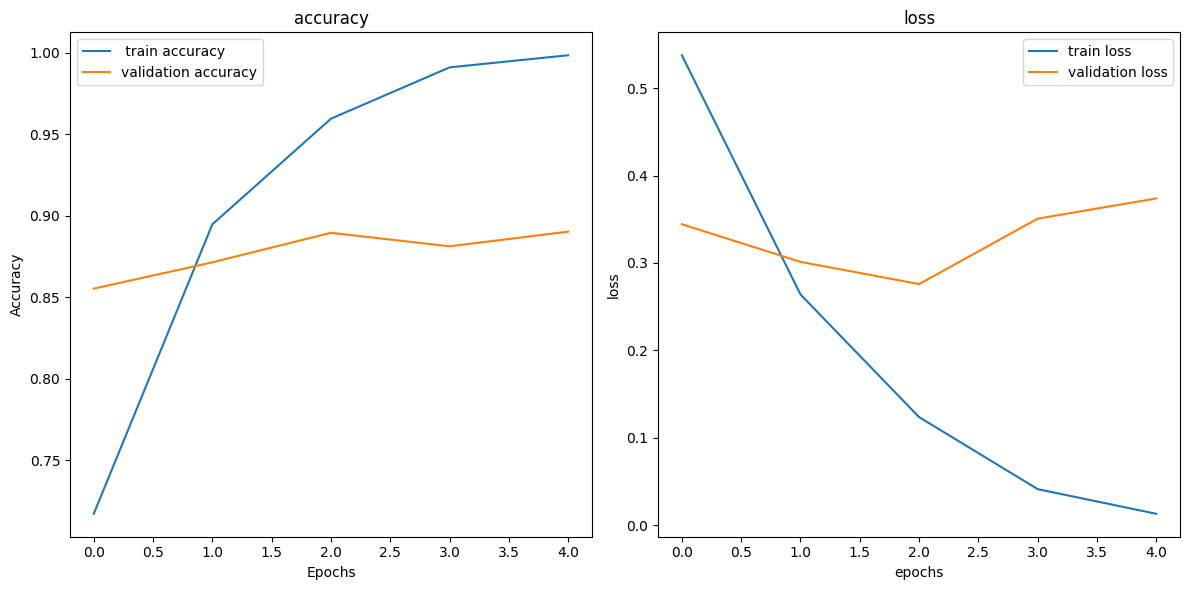

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label=" train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("accuracy")

# loss plot
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("loss")

plt.tight_layout()
plt.show()

In [26]:
import os
import nbformat

# Get current notebook name (Colab workaround)
from google.colab import drive
drive.mount('/content/drive')  # Optional if you're working from Drive

# Replace with your actual notebook path
notebook_path = '/content/drive/MyDrive/Colab Notebooks/IMDb Sentiment Analysis using TensorFlow CNN.ipynb'  # Update this
cleaned_path = '/content/cleaned_notebook.ipynb'

# Load and clean notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

if 'widgets' in nb['metadata']:
    print("Removing metadata.widgets...")
    del nb['metadata']['widgets']

# Save cleaned notebook
with open(cleaned_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print(f"Cleaned notebook saved to: {cleaned_notebook.ipynb}")


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/IMDb_Sentiment_Analysis_using_TensorFlow_CNN.ipynb'